**1.Importing Libraries**

In [31]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns

**2.Load the Dataset**

In [32]:
customer_data = pd.read_csv('Mall_Customers.csv')

**3.Data Exploration**

In [33]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [35]:
customer_data.shape 

(200, 5)

In [36]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**4.Feature Selection**

In [37]:
#We choose 'Annual Income' and 'Spending Score' for clustering

X = customer_data.iloc[:,[3,4]].values 

**5. Elbow Method to find optimal number of clusters**

In [38]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    


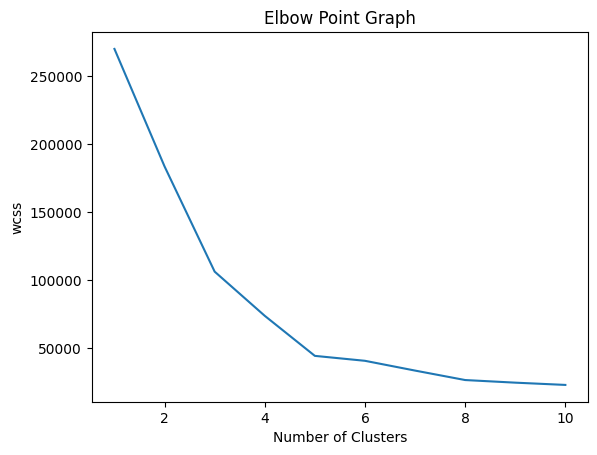

In [39]:
#Plotting the Elbow Graph

sns.set
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title('Elbow Point Graph')
plt.show()

**6.Apply KMeans with chosen k**

In [40]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

Y = kmeans.fit_predict(X)

print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


**7. Visualizing the Clusters**

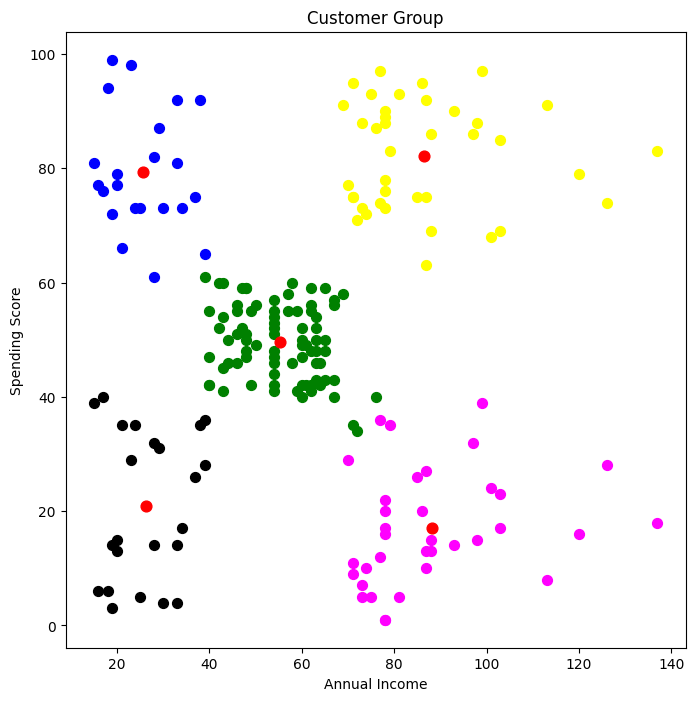

In [41]:
plt.figure(figsize=(8,8))


plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='yellow', label='Cluster 2')

plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue', label='Cluster 3')

plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='magenta', label='Cluster 4')

plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='black', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=60, c='red', label='Centroid')


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Group')

plt.show()

**8. Insights**

In [42]:

print("\nCluster Summary (mean values for each cluster):")
cluster_summary = pd.DataFrame({
    'Cluster': np.arange(optimal_k),
    'Annual Income Mean': [X[Y == i, 0].mean() for i in range(optimal_k)],
    'Spending Score Mean': [X[Y == i, 1].mean() for i in range(optimal_k)],
    'Customer Count': [(Y == i).sum() for i in range(optimal_k)]
})
display(cluster_summary)


Cluster Summary (mean values for each cluster):


,Cluster,Annual Income Mean,Spending Score Mean,Customer Count
0,0,55.296296,49.518519,81
1,1,86.538462,82.128205,39
2,2,25.727273,79.363636,22
3,3,88.200000,17.114286,35
4,4,26.304348,20.913043,23


**Final Insights from Customer Segmentation:**

In this project, I analyzed customer data using their Annual Income and Spending Score to identify different groups of buyers. Using the K-Means algorithm, I found five clear clusters:

Cluster 1 (Green) – Customers with average income and average spending. They are regular buyers but don’t spend too much at once.

Cluster 2 (Yellow) – High-income customers who also spend a lot. These are premium customers who can be targeted for exclusive offers and loyalty programs.

Cluster 3 (Blue) – Lower-income customers who still have high spending habits. They might be brand-conscious or value lifestyle purchases.

Cluster 4 (Black) – Low income and low spending. These customers are more budget-focused and respond better to discounts or offers.

Cluster 5 (Magenta) – High income but low spending. These are potential premium buyers, and marketing can focus on increasing their spending.

**Business Use:**
This segmentation helps in creating targeted marketing strategies. High spenders can be given special offers, regular buyers can get loyalty rewards, and conservative buyers can be encouraged to spend more through promotions.